In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
sns.set()


LOADING THE DATASET

In [2]:
npz = np.load('student performance_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_target = npz['target'].astype(np.int)

npz = np.load('student performance_train.npz')
test_inputs, test_target = npz['inputs'].astype(np.float), npz['target'].astype(np.int)

In [18]:
np.unique(test_target)

array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20])

NOW RUNNING THE MODEL RANDOM FOREST

In [3]:
model = RandomForestClassifier()

In [4]:
r = model.fit(train_inputs, train_target)

In [5]:
model.score(test_inputs, test_target)

0.9967637540453075

In [7]:
p = model.predict(test_inputs)

In [10]:
compare = pd.DataFrame()
compare['test_target'] = test_target
compare['predicting'] = p
compare['Matching'] = np.where(test_target == p, 1, 0)
compare.describe()

,test_target,predicting,Matching
count,309.000000,309.000000,309.000000
mean,10.190939,10.200647,0.996764
std,4.711045,4.709606,0.056888
min,0.000000,0.000000,0.000000
25%,8.000000,8.000000,1.000000
50%,11.000000,11.000000,1.000000
75%,13.000000,13.000000,1.000000
max,20.000000,20.000000,1.000000


CALCULATING MANUALLY THE ACCURACY

In [11]:
counts = (compare['Matching']==1).value_counts().to_dict()
counts

{True: 308, False: 1}

In [12]:
accuracy = counts[True]/(counts[True] + counts[False])

In [13]:
accuracy

0.9967637540453075

CONFUSION MATRIX

In [14]:
from sklearn.metrics import confusion_matrix

In [21]:
np.unique(p)

array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20])

In [32]:
#confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
#, default=None
#cm = confusion_matrix(p, test_target, labels=[0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
cm = confusion_matrix(p, test_target)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  

In [31]:
#MAKING A DATAFRAME FOR THE CONFUSION MATRIX

cm_df = pd.DataFrame(cm)
cm_df.columns = ['P 0','P 4','P 5','P 6','P 7','P 8','P 9','P 10','P 11','P 12','P 13','P 14','P 15','P 16','P 17','P 18','P 19','P 20']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 4',2:'Actual 5',3:'Actual 6',4:'Actual 7',5:'Actual 8',6:'Actual 9'
                           ,7:'Actual 10',8:'Actual 11',8:'Actual 12',10:'Actual 13',11:'Actual 14',12:'Actual 15',13:'Actual 16',14:'Actual 17',15:'Actual 18'
                           ,16:'Actual 19',17:'Actual 20'})
cm_df

,P 0,P 4,P 5,P 6,P 7,P 8,P 9,P 10,P 11,P 12,P 13,P 14,P 15,P 16,P 17,P 18,P 19,P 20
Actual 0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual 4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual 5,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual 6,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual 7,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual 8,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0
Actual 9,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0
Actual 10,0,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0
Actual 12,0,0,0,0,0,1,0,0,36,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0


PLOTTING THE ACCURACY

Text(0, 0.5, 'p')

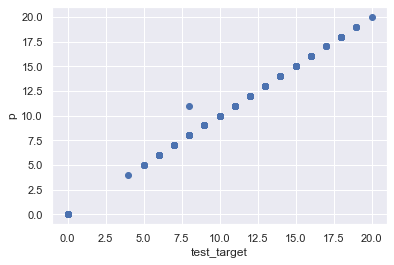

In [37]:
plt.scatter(test_target, p)
plt.xlabel('test_target')
plt.ylabel('p')